In [1]:
from requests import post
from app.analysis import Quote
query = 'query UnknownFile($limit_0:[FundLimitOptionInput!]!) {viewer {...Fe}} fragment Fe on Viewer {_screenFunds4s9d1a:screenFunds(filterCategory:["$$"],limit:$limit_0,first:100) {edges {node {symbol}}}}'
variables = {'limit_0':[{'type':'FUND_TOTAL_ASSETS','min':1000000000,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':.5,'inclusive':True}]}
r = post('https://lens.m1finance.com/graphql', json={'query': query.replace('$$', 'Industries'), 'variables': variables}).json()
symbols = [n['node']['symbol'] for n in r['data']['viewer']['_screenFunds4s9d1a']['edges']]

In [2]:
quote = Quote(symbols, 120)
f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}'

'from 2019-02-25 to 2019-06-25 - 47'

In [3]:
stat = quote.statistics(21)
stat = stat[(stat['drawdown'] < 8) & (stat['21-shrp'] > 0.4)]
stat

,21-len,21-mean,21-std,21-shrp,drawdown
Symbols,,,,,
XLP,64,2.291556,1.524947,1.393419,4.021399
VDC,64,1.811493,1.541135,1.067282,4.396198
XAR,64,2.651812,3.045091,0.816115,6.769803
ITB,64,3.233224,4.059869,0.755334,5.964365
IGF,64,1.430676,1.757421,0.719241,2.242252
VPU,64,1.448639,1.800319,0.712081,3.258989
XLU,64,1.490029,1.888915,0.700594,3.426057
IYF,64,1.407674,2.615545,0.474474,5.206847


In [5]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 2, ['XLP'])

['XLP'] 0.21086108482608257 0.6 0.8042797087596598 1.3934186239335773
['XLP', 'XAR'] 0.08876612688104935 0.1144129158978131 1.0791201265159225 1.1047669155326862
['XLP', 'IGF'] 0.06037876748773985 0.4903436017115439 0.6263650510637723 1.0563298852875762
['XLP', 'VPU'] -0.1843592972936986 0.1403516861898968 0.7280387258630757 1.0527497093466711


['XLP', 'VPU']

In [6]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 4, ['XLP', 'VPU'], sr=0)

['XLP', 'VPU'] 0.8683904120529725 0.1403516861898968 0.7280387258630757 1.0527497093466711
['XLP', 'VPU', 'VDC'] 0.7877315129230062 0.4092925286213663 0.7784389843016399 1.0575939695963716
['XLP', 'VPU', 'VDC', 'XAR'] 0.31294722464276925 0.1906278503484932 0.9223193742942761 0.9972242789802275
['XLP', 'VPU', 'XAR', 'ITB'] 0.2767726976713192 0.07604497345146544 1.0007277242198538 0.9192371875503738
['XLP', 'VPU', 'XAR', 'IGF'] 0.18874678502033482 0.17412468767877964 0.8146220973415552 0.9102139431166781
['XLP', 'VPU', 'ITB', 'XLU'] 0.17469663760657772 0.14115620375717697 0.8335404338494008 0.890356860695897


['XLP', 'VPU', 'ITB', 'XLU']

In [7]:
quote.setup_mask(['XLP', 'VPU', 'ITB'])
quote.find_optimal_ratio(21, 1)

/Users/chaoyi/.local/share/virtualenvs/portfolio_analysis-bdMx2S3t/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


(Symbols
 XLP    0.208198
 VPU    0.614716
 ITB    0.177085
 dtype: float64, 1.9402, 1.1847)

Populating the interactive namespace from numpy and matplotlib


,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,64.0,1.922009,1.183522,-1.772822,1.489561,2.124281,2.659612,4.353308,1.483151,3.007147
XLP,64.0,2.291556,1.524947,-2.438597,1.645307,2.731452,3.292396,4.497904,1.393419,4.021399
ITB,64.0,3.233224,4.059869,-3.981024,0.743688,2.118206,7.082778,13.079428,0.755334,5.964365
VPU,64.0,1.448639,1.800319,-1.713539,0.046302,1.384789,2.862357,5.136484,0.712081,3.258989


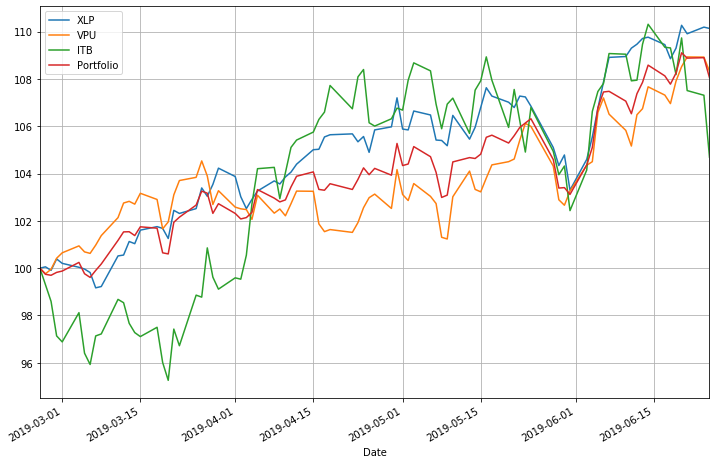

In [8]:
%pylab inline
quote.setup_mask(['XLP', 'VPU', 'ITB'])
quote.graph(21, {'XLP': .21, 'VPU': .61, 'ITB': .18})